<a href="https://colab.research.google.com/github/vishva2410/Stock-price-prediction/blob/main/StockTensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
from datetime import datetime

In [ ]:
data = pd.read_csv('all_stocks_5yr.csv', delimiter=',', on_bad_lines='warn')
print(data.sample(10))

<ipython-input-17-972866170571>:1: ParserWarning: Skipping line 21794: expected 7 fields, saw 11
Skipping line 65786: expected 7 fields, saw 11
Skipping line 87834: expected 7 fields, saw 8

  data = pd.read_csv('all_stocks_5yr.csv', delimiter=',', on_bad_lines='warn')
<ipython-input-17-972866170571>:1: ParserWarning: Skipping line 153096: expected 7 fields, saw 9
Skipping line 218922: expected 7 fields, saw 11

  data = pd.read_csv('all_stocks_5yr.csv', delimiter=',', on_bad_lines='warn')
<ipython-input-17-972866170571>:1: ParserWarning: Skipping line 284305: expected 7 fields, saw 13
Skipping line 328368: expected 7 fields, saw 12

  data = pd.read_csv('all_stocks_5yr.csv', delimiter=',', on_bad_lines='warn')
<ipython-input-17-972866170571>:1: ParserWarning: Skipping line 438603: expected 7 fields, saw 10
Skipping line 460651: expected 7 fields, saw 9

  data = pd.read_csv('all_stocks_5yr.csv', delimiter=',', on_bad_lines='warn')


              date   open     high      low   close     volume   Name
622779  2017-09-25  75.66    76.36    75.43   76.11     868962    VNO
477276  2015-11-19  75.32    76.38    74.81    75.3  3755384.0    OXY
488074  2013-10-31  84.65     84.9    84.09   84.09  4572187.0    PEP
118901  2015-05-19  548.0    553.4   547.12  549.28    2356274  GOOGL
408175  2017-03-23  93.47    95.32  93.2201    94.3  1666855.0     EW
595300  2015-06-12  86.46    86.69    85.79   86.01    2515878    TWX
292342  2015-11-11  67.42    67.98     67.4   67.62    1282078      K
616901  2014-05-22  62.19    62.56     61.9   62.42    1028105    VFC
430574  2017-03-31  148.0  148.225   147.33  147.81  3888237.0   NFLX
47770   2015-05-28   38.1    38.32   37.975   38.24    1182137    AIV


<ipython-input-17-972866170571>:1: DtypeWarning: Columns (1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('all_stocks_5yr.csv', delimiter=',', on_bad_lines='warn')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663092 entries, 0 to 663091
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    663092 non-null  object
 1   open    663078 non-null  object
 2   high    663081 non-null  object
 3   low     663080 non-null  object
 4   close   663087 non-null  object
 5   volume  663085 non-null  object
 6   Name    663082 non-null  object
dtypes: object(7)
memory usage: 35.4+ MB


In [ ]:
print(data.shape)

(663092, 7)


In [60]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663092 entries, 0 to 663091
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    663089 non-null  datetime64[ns]
 1   open    532008 non-null  datetime64[ns]
 2   high    532010 non-null  datetime64[ns]
 3   low     663080 non-null  object        
 4   close   401172 non-null  datetime64[ns]
 5   volume  663085 non-null  object        
 6   Name    663082 non-null  object        
dtypes: datetime64[ns](4), object(3)
memory usage: 35.4+ MB


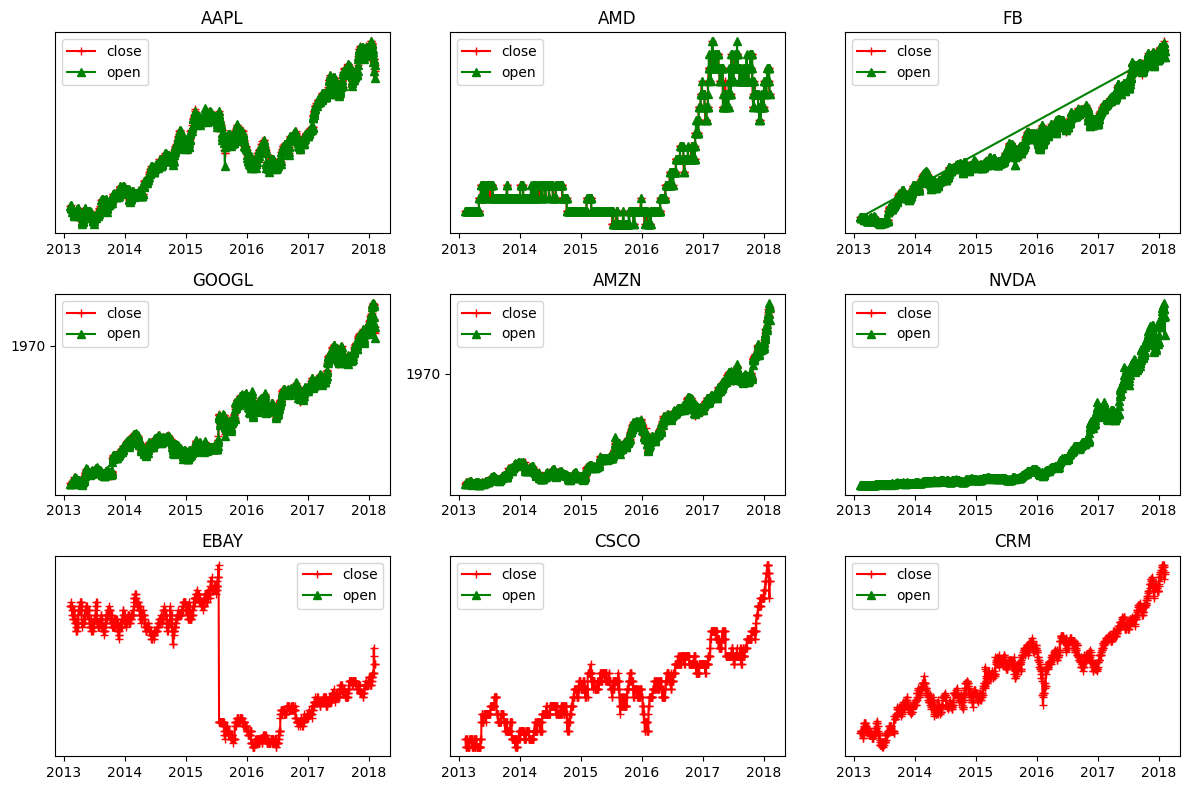

In [61]:
companies = ['AAPL', 'AMD', 'FB', 'GOOGL', 'AMZN', 'NVDA', 'EBAY', 'CSCO', 'CRM']

plt.figure(figsize=(12, 8))
for index, company in enumerate(companies, 1):
    plt.subplot(3, 3, index)
    c = data[data['Name'] == company]
    plt.plot(c['date'], c['close'], c="r", label="close", marker="+")
    plt.plot(c['date'], c['open'], c="g", label="open", marker="^")
    plt.title(company)
    plt.legend()
    plt.tight_layout()

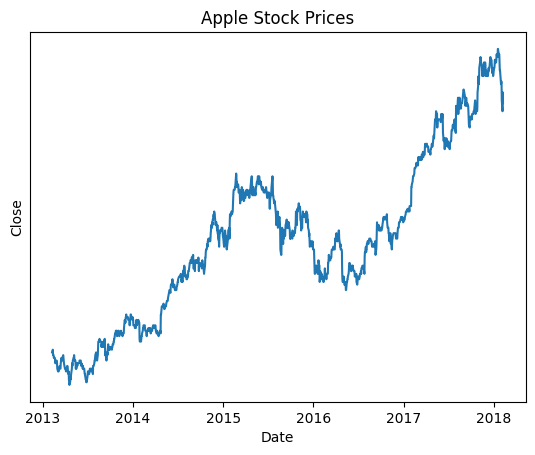

In [62]:
import datetime
import matplotlib.pyplot as plt

apple = data[data['Name'] == 'AAPL']
data['date'] = pd.to_datetime(data['date'])

prediction_range = apple.loc[(apple['date'] > datetime.datetime(2000,1,1))
                             & (apple['date'] < datetime.datetime(2023,1,1))]

plt.plot(prediction_range['date'], prediction_range['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Apple Stock Prices")
plt.show()


In [63]:
close_data = apple.filter(['close'])
dataset = close_data.values
training = int(np.ceil(len(dataset) * .95))
print(training)


1197


In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training), :]
# prepare feature and labels
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [65]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
                            return_sequences=True,
                            input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(30))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(1))
model.summary



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<bound method Model.summary of <Sequential name=sequential_4, built=True>>

In [66]:
model.compile(optimizer='adam',
              loss='mean_squared_error')
history = model.fit(x_train,
                    y_train,
                    epochs=15)


Epoch 1/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.0516
Epoch 2/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0079
Epoch 3/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0067
Epoch 4/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0065
Epoch 5/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0061
Epoch 6/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0057
Epoch 7/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0046
Epoch 8/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0057
Epoch 9/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0051
Epoch 10/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0050
Epoch 11/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0050
Epoch 12/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0049
Epoch 13/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0045
Epoch 14/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0045
Epoch 15/15
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0040


In [81]:
test_data = scaled_data[training - 65:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(65, len(test_data)):
    x_test.append(test_data[i-65:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [82]:

# predict the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step 


In [83]:
print(data.dtypes)
data['close'] = pd.to_numeric(data['close'], errors='coerce')


date      datetime64[ns]
open      datetime64[ns]
high      datetime64[ns]
low               object
close              int64
volume            object
Name              object
dtype: object


In [84]:
close_data = data.filter(['close'])
dataset = close_data.values
y_test = dataset[training:, :]


In [85]:
y_test = dataset[training:, :]  # Original selection (too many values)
y_test = y_test[-len(predictions):]  # Fix: Select the last `len(predictions)` values


In [86]:
print(f"predictions shape: {predictions.shape}")
print(f"y_test shape: {y_test.shape}")


predictions shape: (62, 1)
y_test shape: (62, 1)


In [87]:
y_test = y_test[-len(predictions):]  # Adjust size to match predictions


In [88]:
mse = np.mean(((predictions - y_test) ** 2))
print("MSE", mse)
print("RMSE", np.sqrt(mse))


MSE 10586.162322300508
RMSE 102.88907775998631


<ipython-input-89-3809fdfc872e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


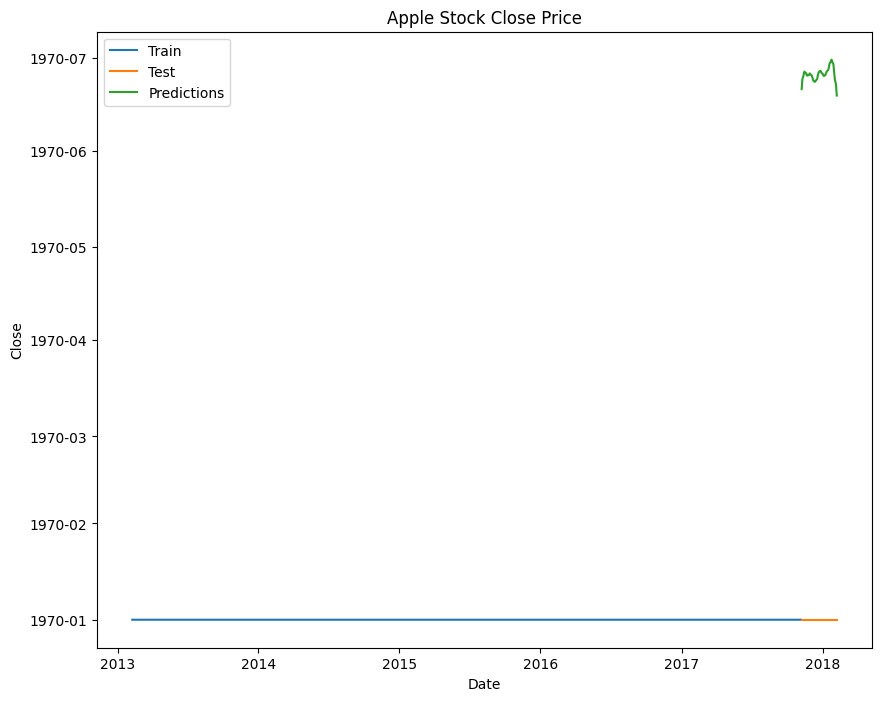

In [89]:
train = apple[:training]
test = apple[training:]
test['Predictions'] = predictions

plt.figure(figsize=(10, 8))
plt.plot(train['date'], train['close'])
plt.plot(test['date'], test[['close', 'Predictions']])
plt.title('Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])

# This code is modified by Susobhan Akhuli
